# Capital asset pricing model

The capital asset pricing model (CAPM) describe the relationship of the return of an asset (stocks) as compared to the market.

\begin{equation}
ER_{i} = R_{f} + \beta (ER_{m} - R_{f})
\end{equation}

where:

$ER_{i}$: expected return of the asset

$R_{f}$: risk free interest rate (assume to be 0 in this notebook)

$ER_{m}$: expected return of market

$\beta$: describes how volatile the stock is as compared to the market

This notebook aims at finding $\beta$ of a certain asset.

## Import data and libraries

In [1]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd

# Library for plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
params = {
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 18

}
rcParams.update(params)
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi'] = 100

/Users/dangminh.nguyen/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
stock_code = 'ARKW'
assets = [stock_code,'^GSPC']
df = pd.DataFrame()
for a in assets:
    df[a] = wb.DataReader(a,data_source='yahoo',start='2015-01-01')['Adj Close']

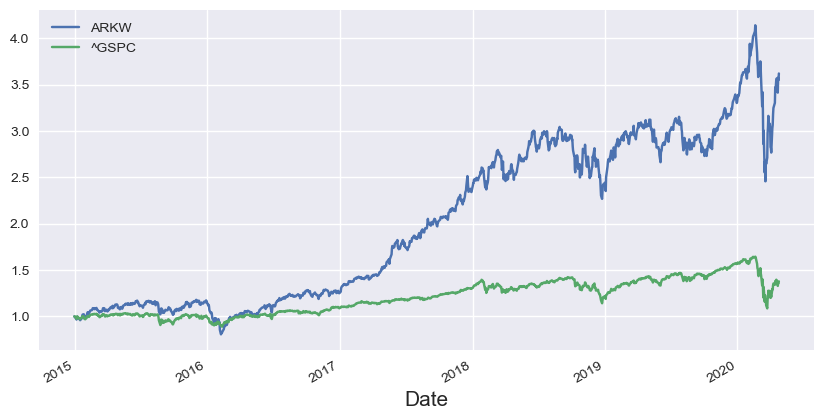

In [3]:
(df/df.iloc[0]).plot(figsize=(10,5))

## Finding $\beta$ using correlations

In [4]:
df_ret = df/df.shift(1)-1
cov_with_market = df_ret.cov().iloc[0,1]*250
market_var = df_ret['^GSPC'].var()*250
beta = cov_with_market/market_var
print("Beta: %.4f"%beta)

sharp = df_ret[stock_code].mean()*250/((df_ret[stock_code].std()*250)**0.5)
print("Sharp: %.4f"%sharp)

Beta: 1.1268
Sharp: 0.1343


## Finding $\alpha$ and $\beta$ using regression

The modified CAPM model is:

\begin{equation}
ER_{i} = \alpha + R_{f} + \beta (ER_{m} - R_{f})
\end{equation}

A positive $\alpha$ means the stock is doing better than the market, and vice versa

In [5]:
df_ret = df/df.shift(1)-1
df_ret = df_ret[1:]

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
x_train = df_ret['^GSPC'].values.reshape(-1,1)
y_train = df_ret[stock_code].values.reshape(-1,1)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print("Alpha: %.5f%%"%(model.intercept_*100))
print("Beta: %.5f"%model.coef_)

Alpha: 0.07626%
Beta: 1.12678
